<a href="https://colab.research.google.com/github/bro-kite/Breast_Recurrence_Test/blob/master/Jhub_Breast_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pytest
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)


    return raw_df

In [ ]:
local_file_path = "breast-cancer.xls"

In [ ]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [ ]:
raw_data.head()

,age,tumor-size,inv-nodes,deg-malig,menopause,breast-quad,node-caps,breast,irradiat,Class
0,40-49,15-19,0-2,3,premeno,left_up,yes,right,no,recurrence-events
1,50-59,15-19,0-2,1,ge40,central,no,right,no,no-recurrence-events
2,50-59,35-39,0-2,2,ge40,left_low,no,left,no,recurrence-events
3,40-49,35-39,0-2,3,premeno,left_low,yes,right,yes,no-recurrence-events
4,40-49,30-34,2019-05-03 00:00:00,2,premeno,right_up,yes,left,no,recurrence-events


###Dataset Information

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   tumor-size   286 non-null    object
 2   inv-nodes    286 non-null    object
 3   deg-malig    286 non-null    int64 
 4   menopause    286 non-null    object
 5   breast-quad  286 non-null    object
 6   node-caps    286 non-null    object
 7   breast       286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
raw_data['inv-nodes'] =raw_data['inv-nodes'].astype(str)
raw_data['tumor-size'] =raw_data['tumor-size'].astype(str)

##Data Preprocessing

###Removing symbols and outliers in dataset

In [ ]:
raw_data['inv-nodes'] = raw_data['inv-nodes'].apply(lambda X: X.replace('-',''))
raw_data['inv-nodes'] = raw_data['inv-nodes'].apply(lambda X: X.replace('1517','2'))
raw_data['inv-nodes'] = raw_data['inv-nodes'].apply(lambda X: X.replace('2426','2'))

In [ ]:
raw_data['age'] = raw_data['age'].apply(lambda X: X.replace('-',''))

In [ ]:
raw_data['tumor-size'] = raw_data['tumor-size'].apply(lambda X: X.replace('-',''))

In [ ]:
raw_data['inv-nodes'] = raw_data['inv-nodes'].apply(lambda X: X.replace('-',''))

In [ ]:
raw_data['Class'] = raw_data['Class'].apply(lambda X: X.replace('events',''))
raw_data['Class'] = raw_data['Class'].apply(lambda X: X.replace('-',''))

In [ ]:
raw_data['breast-quad'] = raw_data['breast-quad'].apply(lambda X: X.replace('_',''))

###Removing non-formatting entries from columns

In [ ]:
raw_data.loc[raw_data['inv-nodes'].str.contains('201'), 'inv-nodes'] = np.nan

In [ ]:
raw_data.loc[raw_data['tumor-size'].str.contains('201'), 'tumor-size'] = np.nan

###Converting to Int Dtype

In [ ]:
raw_data['age'] = raw_data['age'].astype(str).astype(int)

In [ ]:
raw_data['inv-nodes'] = raw_data['inv-nodes'].astype(float)

In [ ]:
raw_data['tumor-size'] = raw_data['tumor-size'].astype(float)

In [ ]:
raw_data['deg-malig'] = raw_data['deg-malig'].astype(str).astype(int)

In [ ]:
raw_data.head()

,age,tumor-size,inv-nodes,deg-malig,menopause,breast-quad,node-caps,breast,irradiat,Class
0,4049,1519.0,2.0,3,premeno,leftup,yes,right,no,recurrence
1,5059,1519.0,2.0,1,ge40,central,no,right,no,norecurrence
2,5059,3539.0,2.0,2,ge40,leftlow,no,left,no,recurrence
3,4049,3539.0,2.0,3,premeno,leftlow,yes,right,yes,norecurrence
4,4049,3034.0,NaN,2,premeno,rightup,yes,left,no,recurrence


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          286 non-null    int64  
 1   tumor-size   254 non-null    float64
 2   inv-nodes    220 non-null    float64
 3   deg-malig    286 non-null    int64  
 4   menopause    286 non-null    object 
 5   breast-quad  286 non-null    object 
 6   node-caps    286 non-null    object 
 7   breast       286 non-null    object 
 8   irradiat     286 non-null    object 
 9   Class        286 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 22.5+ KB


###Outlier Analysis

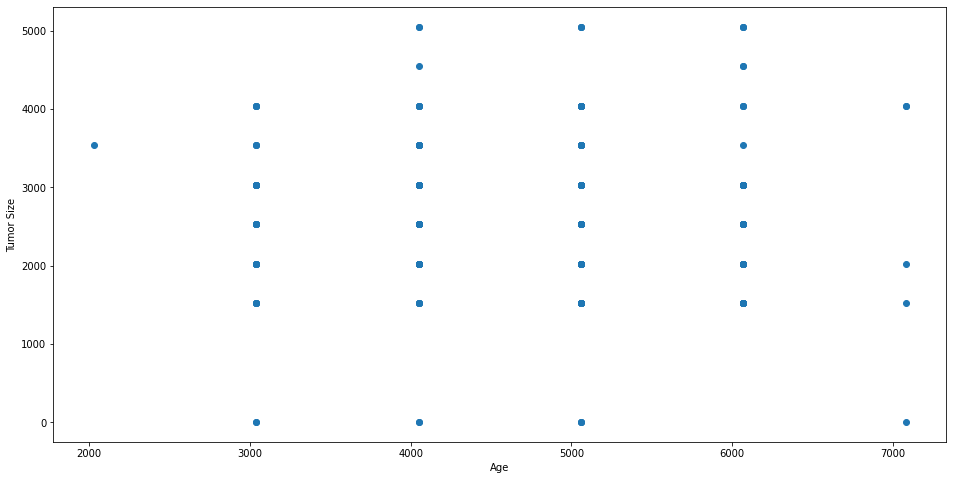

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(raw_data['age'], raw_data['tumor-size'])
ax.set_xlabel('Age')
ax.set_ylabel('Tumor Size')
plt.show()

*No key outliers that need to be removed from the data* 

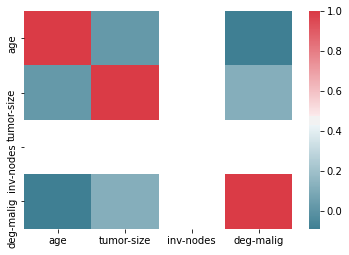

In [ ]:
corr = raw_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

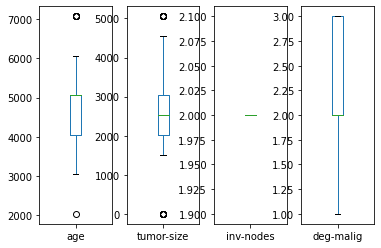

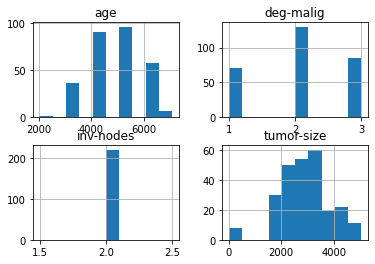

In [ ]:
raw_data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

raw_data.hist()
plt.show()

###Creating X and y variables

In [ ]:
X = raw_data.iloc[:, :-1].values
y = raw_data.iloc[:, -1].values

###Replacing NaN values with Mode

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

###Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5,6,7,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

###Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

###Splitting the data into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Training the Model

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#from catboost import CatBoostClassifier
#model = CatBoostClassifier()
#model.fit(X_train, y_train)

##Using the model to make a prediction

###Predict Test Set Results

In [ ]:
y_pred = model.predict(X_test)

##Model Accuracy

###Cofusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  3]
 [11  9]]


0.7586206896551724

###Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.99 %
Standard Deviation: 6.25 %


##Predicting a New Result

Data must be input using the following format


---


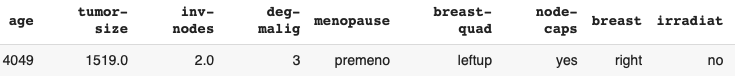

In [ ]:
age = 
tumor_size = 
inv_nodes =
deg_malig = 
menopause = 
breast_quad = 
node_caps = 
breast = 
irradiat = 

In [ ]:
sample = pd.DataFrame({'age' : [age],'tumor-size': [tumor_size],'inv-nodes':[inv_nodes],'deg-malig':[deg_malig],'menopause':['menopause'], 'breast-quad':['breast_quad'],	'node-caps':['node_caps'], 'breast':['breast'], 'irradiat':['irradiat']})

In [ ]:
sample = np.array(ct.transform(sample))

In [ ]:
print(model.predict(sc.transform(sample)))

Recurrence = 1
No recurrence = 0